In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Import BeamSection module from FlightBEND
from flightBEND import BeamSection

## Asymmetric profile (Chen *et al*, 2010)
---

In [12]:
## Import mesh: Assymetric profile; Element type Q9; 

# Mesh with 40 elements (1 element through the thickness)
# from meshes.asymmetric_Q9_40e  import dados as data

# Mesh with 158 elements (2 element through the thickness)
from meshes.asymmetric_Q9_158e  import dados as data


In [13]:
## Unpacking mesh data
secNodes    = data['coordinates'] * 1e-3 # [m]
secElems    = data['elements']
secYoung    = 206.843e9     # [Pa]
secNu       = 0.49
secRho      = 1068.69e-9    # [kg/mm3]


# Instancing BeamSection object
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)

Area properties integration time:    0.133 seconds
Global stiffness assembly time:      0.396 seconds
System solve time:                   0.001 seconds
Shear center integration time:       0.192 seconds
Torsional constant integration time: 0.169 seconds


In [14]:
# Torsional rigidity
GJ = sec.G[0]*sec.areaProperties['J_phi']
# Center of torsion
yCT = sec.areaProperties['Y_CT']
zCT = sec.areaProperties['Z_CT']
# Max and min warping
phi_max = np.max(sec.displacements)
phi_min = np.min(sec.displacements)


print('')
print(f'# of Elems. = {sec.totalElements} ')
print(f'# of Dofs   = {sec.totalDofs} ')
print(f'        G*J = {GJ: .4E} N*m²')
print(f'        yCT = {yCT: .4E} m')
print(f'        zCT = {zCT: .4E} m')
print(f'    phi_max = {phi_max: .4E} m')
print(f'    phi_min = {phi_min: .4E} m')


# of Elems. = 158 
# of Dofs   = 795 
        G*J =  4.9329E+00 N*m²
        yCT = -4.4914E-03 m
        zCT = -7.9818E-03 m
    phi_max =  1.7022E-04 m
    phi_min = -9.8975E-05 m


(-0.005986012951760786, 0.0254, -0.0127, 0.0127)

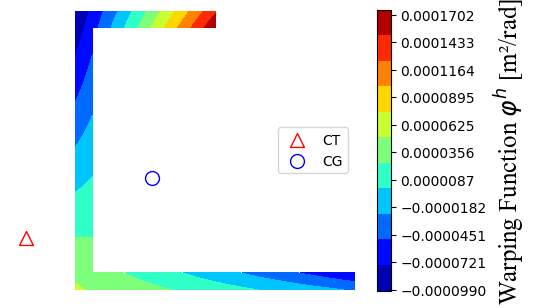

In [15]:
## Warping
fig, ax = sec.plotWarping(levels=10, showMesh=False, lengthUnits='m',
                          cbarKwargs=dict(shrink=.68)
                          )

# Remove legend and axis frame 
# ax.get_legend().remove()
ax.axis('off')

(-0.00127, 0.02667, -0.01397, 0.01397)

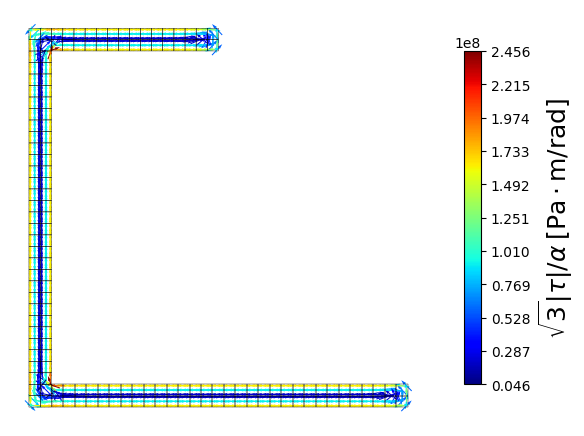

In [16]:
## Shear stresses
fig2, ax2 = sec.plotShearStresses(degree=4, mises=True, 
                                  lengthUnits='m', stressUnits='Pa',
                                  width=.00007,scale=1000,figsize=(8,5),
                                  cbarKwargs=dict(shrink=.8)
                                  )

# Remove axis frame 
ax2.axis('off')